# Task 2

The second task is about classifying handwritten digits. We will use the MNIST dataset for training and testing. The point of this task is to develop a multi-layer neural network for classification using mostly Numpy:
* Implement sigmoid and relu layers (with forward and backward pass) 
* Implement a softmax output layer 
* Implement a fully parameterizable neural network (number and types of layers, number  of units) 
* Implement an optimizer (e.g. SGD or Adam) and a stopping criterion of your choosing 
* Train your Neural Network using backpropagation.

Evaluate different neural network architectures and compare your different results. You can also compare with the results presented in http://yann.lecun.com/exdb/mnist/


### Loading the Data Set

We will use Pytorch's torchvision module to load the MNIST dataset.

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Downloading MNIST
# Resources used:
# https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
# https://pytorch.org/docs/stable/torchvision/datasets.html#mnist

transform = transforms.Compose(
    [transforms.ToTensor()])

#Transet is the entire train set... each item is a 2-tuple, containing an tensor (numeric rep of image) and the target value (int)
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)


Size of Train set is 60000
Size of Test set is 10000

Image depicts the target: 4


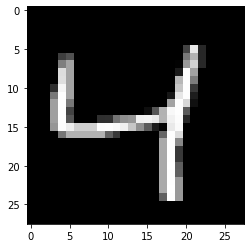

In [3]:
def display_image(image_pos=0, set=trainset):
    # First image's tensor accessed by set[0][0], its shape is 1, 28, 28
    # Notice set[0][1] is the target class of that image.. in this case, 5
    print(f"Image depicts the target: {set[image_pos][1]}")
    # imshow(imshow(torchvision.utils.make_grid(trainset[0][0])))
    imgplot = plt.imshow(set[image_pos][0].numpy().reshape((28, 28)), cmap='gray')


print(f"\nSize of Train set is {len(trainset)}")
print(f"Size of Test set is {len(testset)}\n")

display_image(image_pos=2, set=trainset)


## The Neural Network


In [4]:
class NeuralNetwork():
    def __init__(self, n):
        self.m = 1 #Number of data points (initially 1, set to real value during fit function )
        self.n = n #Number of features
        self.h_x = 0

        #Weights
        self.w_0 = np.random.rand(self.n, self.n) #w_0 connects input to hidden layer 1
        self.w_1 = np.random.rand(10, self.n) #w_1 connects hidden layer 1 to output

        #Forward pass
        self.a_0 = np.zeros((self.n, 1))
        self.z_1 = np.zeros((self.n, 1))
        self.a_1 = np.zeros((self.n, 1))
        self.z_2 = np.zeros((10, 1))
        self.a_2 = np.zeros((10, 1))

        #Delta values
        self.d_2 = np.zeros(self.a_2.shape) #delta of output layer
        self.d_1 = np.zeros(self.a_1.shape) #delta of hidden layer

    def one_hot_encode(self, y):
        encoded_y = np.zeros(10)
        encoded_y[y] = 1
        return encoded_y
    
    def sigmoid(self, X, diff=False):
        sigmoid_original = 1 / (1 + np.e**(-X))
        if (not diff):
            return sigmoid_original
        else:
            return sigmoid_original * (1 - sigmoid_original)

    def softmax(self, X, diff=False):
        return (np.e ** X) / sum(np.e ** X)

    def forward_pass(self, X):
        #Input
        self.a_0 = X
        #Hidden layer 1
        self.z_1 = np.dot(self.w_0, self.a_0) #Sum of the products between w_1 and a_0
        self.a_1 = self.sigmoid(self.z_1) #Pass z_1 through activation function (relu)
        #Output layer
        self.z_2 = np.dot(self.w_1, self.a_1) #Sum of the products between w_2 and a_1 
        self.a_2 = self.softmax(self.z_2) #Pass z_2 through activation fucntion (softmax)
        self.h_x = self.a_2 #Set hypothesis to equal a_2

    def backward_pass(self, y):
        #Encode y
        y = self.one_hot_encode(y)

        #Calculate Deltas
        self.d_2 = self.h_x - y
        self.d_1 = self.w_1.transpose().dot(self.d_2) * self.sigmoid(self.z_1, diff=True)

        #Update Weights
        self.w_0 -= self.d_1.dot(self.a_0.transpose()) / self.m

        #Issue for dot product of vectors (1 as the size of a matrix dimension)
        #Added an extra dimension to fix. Idea from: https://stackoverflow.com/questions/23566515/multiplication-of-1d-arrays-in-numpy
        self.w_1 -= self.d_2[:,None].dot(self.a_1[:,None].transpose()) / self.m # (10x1) . (1x784) = (10 x 784)

        print(f"Error is {self.calculate_cost(self.h_x, y)}")

    def calculate_cost(self, h_x, y):
        # y = self.one_hot_encode(y)
        error = (sum(y * np.log(h_x) + (1 - y) * np.log(1 - h_x)) * -1) / self.m
        return error

    def fit(self, data):
        #Forward pass
        X = data[0][0].numpy().flatten() #Flatten input
        y = data[0][1] #The target value
        self.m = len(data)
        self.forward_pass(X)

        for i in range(10):
            self.backward_pass(y)
            self.forward_pass(X)
        

In [5]:
nn = NeuralNetwork(n=784)
nn.fit(trainset)

Error is 0.0004257442139073495
Error is 0.00042510622287980903
Error is 0.0004244684244256244
Error is 0.00042383082084490885
Error is 0.0004231934144623015
Error is 0.00042255620762717314
Error is 0.00042191920271376134
Error is 0.0004212824021213943
Error is 0.0004206458082746685
Error is 0.00042000942362364256


In [6]:
print(trainset[0])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [7]:
print(len(trainset))

60000
